# <a href="Resources/pdf/4_Regression_1_Linear_Multiple_Polynomial_230818_225123.pdf">Simple, Multiple and Polynomial Regression</a>

# 1)- Gradient Descent

[-100.   -99.9  -99.8 ...   99.7   99.8   99.9] [10000.    9980.01  9960.04 ...  9940.09  9960.04  9980.01]


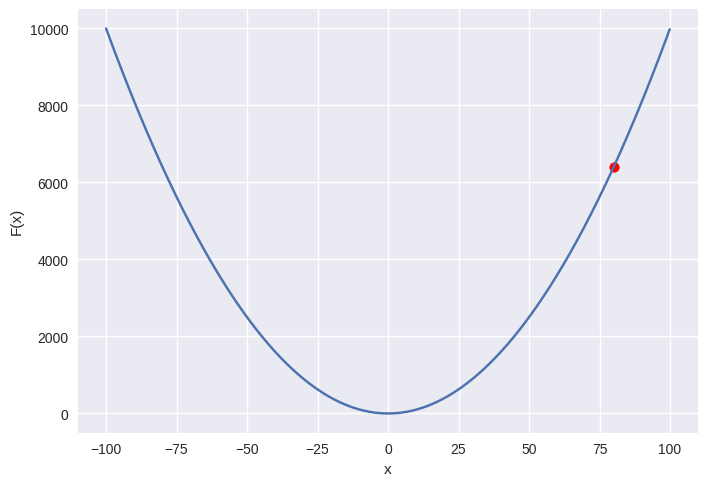

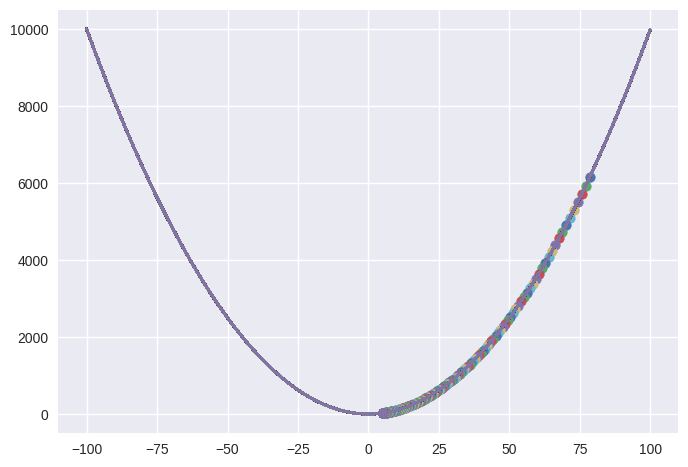

In [70]:
import numpy as np
import matplotlib.pyplot as plt

##generating data
def y_fun(x):
    return (x)**2
def y_derivative(x):
    return 2*(x-5)

#prepareing data
x = np.arange(-100,100,0.1)
y = y_fun(x)
print(x,y)

current_position = (80,y_fun(80))

learning_rate = 0.01


#visualization
plt.style.use("seaborn")
plt.plot(x,y)
plt.scatter(current_position[0],current_position[1],c='r')
plt.ylabel("F(x)")
plt.xlabel("x")
plt.show()

error = []
for i in range(1000):
    new_x =  current_position[0] - learning_rate * y_derivative(current_position[0])
    new_y = y_fun(new_x)
    current_position = (new_x,new_y)
    error.append(new_y)
    plt.plot(x,y)
    plt.scatter(current_position[0],current_position[1])
#     plt.pause(0.001) #use for animation
#     plt.clf() #clears before img afterwords

<function matplotlib.pyplot.show(close=None, block=None)>

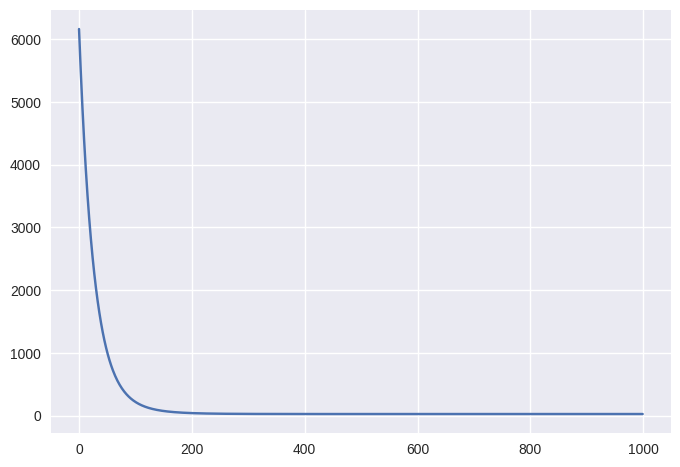

In [71]:
plt.plot(error)
plt.show

# Linear Regression without using Library

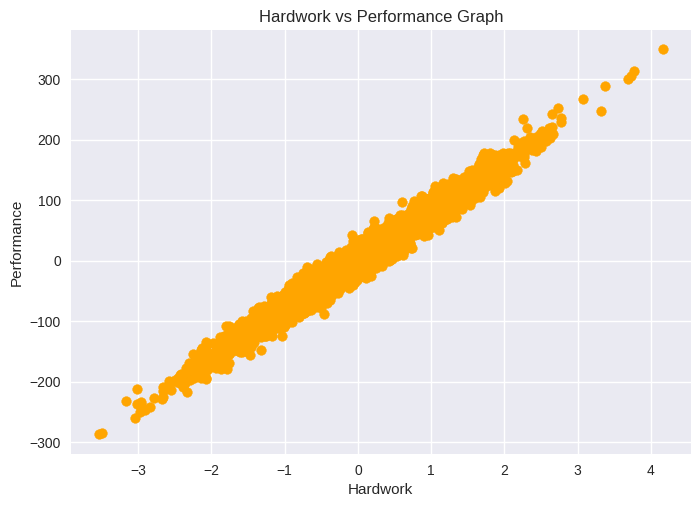

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading dataset
# Load
X = pd.read_csv('./Resources/Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Resources/Training Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [178]:
##line equation or hypothesis equation for best-fit line(h(theta(0),x) = theta(0) + theta(1)*x)
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [179]:
theta,error_list,theta_list = gradientDescent(X,y)

In [180]:
theta_list

[(0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293191729063332,

In [181]:
theta

array([ 0.6838508 , 79.90361453])

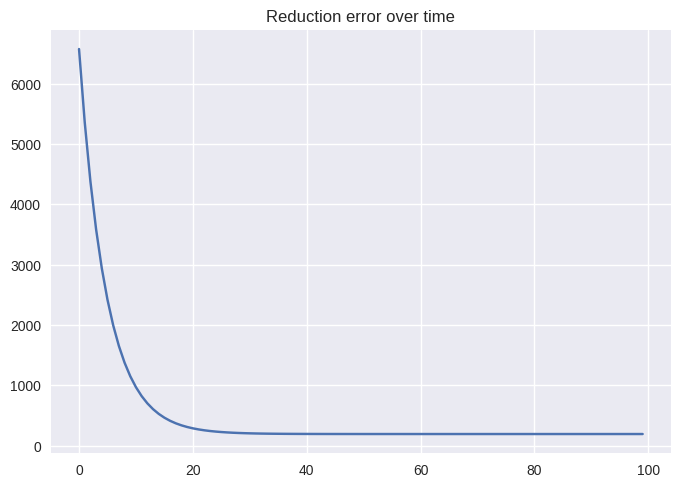

In [103]:
#plotting error list
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [105]:
# Section - 3 Predictions and Best Line
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


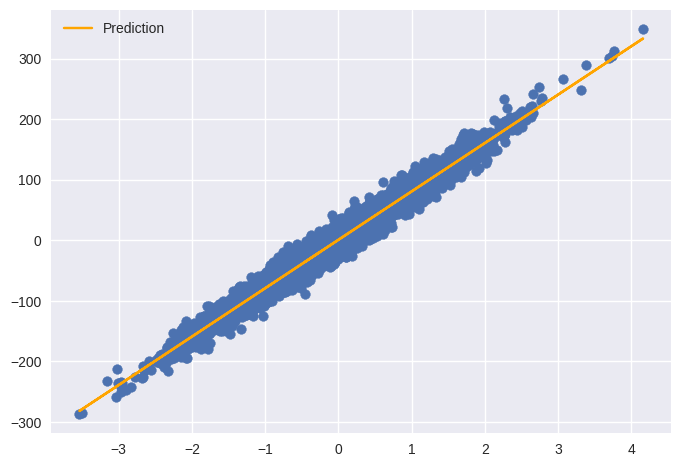

In [106]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [50]:
# Load the test data
X_test = pd.read_csv('./Resources/Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

df = pd.DataFrame(data=y_test,columns=["y"])
df.to_csv('./Resources/y_prediction.csv',index=False)

NameError: name 'hypothesis' is not defined

Section - 4 Computing Score

Score : R2 (R-Squared) or Coefficient of Determination

In [109]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100
r2_score(y,y_)

97.09612226971643

Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

# 1)- Simple Linear Regression
using **from sklearn.linear_model import LinearRegression**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [183]:
## reading dataset
df = pd.read_csv("Resources/height-weight.csv")
df.head()
# print(df.shape)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

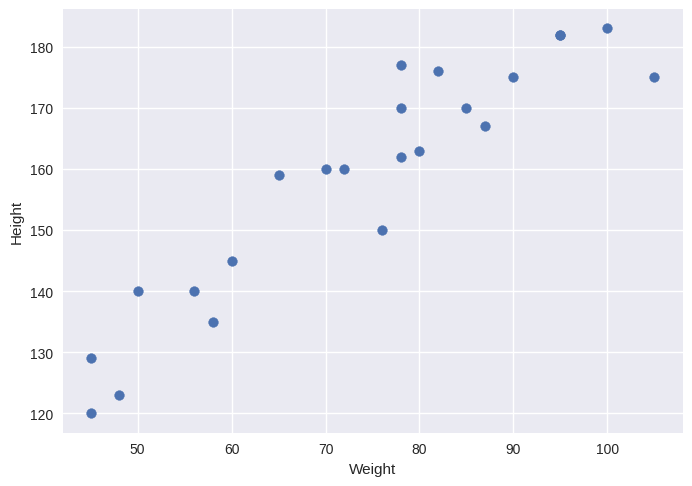

In [184]:
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

## Prerequisits for training a ML model:
1. **Dataset**
2. Divide feature into Independent and Dependent features
3. **Train-Test Split** of the dataset
4. Standardizing the Data: important for distance based algorithms

In [185]:
##dividing dataset into Independent and Dependent features
x = df[['Weight']] ##independent feature
y = df[['Height']] ##Dependent feature

In [186]:
#Train-Test split using sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [187]:
x.shape

(23, 1)

In [188]:
print(f"x_train length: {x_train.shape}/nx_test length: {x_test.shape}")
print(f"y_train length: {y_train.shape}/ny_test length: {y_test.shape}")

x_train length: (18, 1)/nx_test length: (5, 1)
y_train length: (18, 1)/ny_test length: (5, 1)


In [189]:
## Standardizing the Independent Train Feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 
#no need for fit-transform for test data, mean,std,and z-score of train data will be used for transforming test 
#data to avoid "Data Leakage"

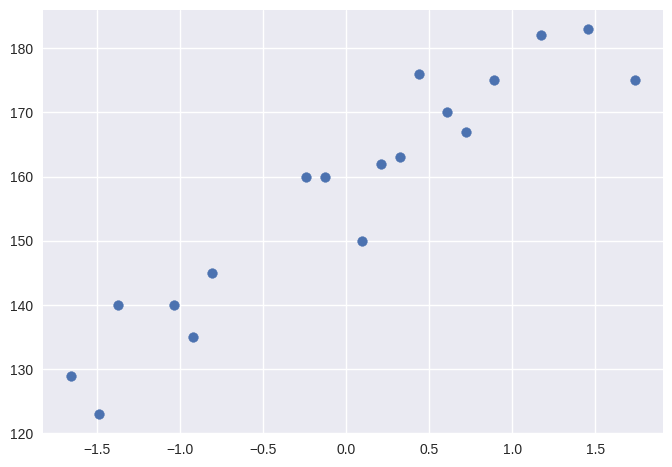

In [191]:
plt.scatter(x_train,y_train)

In [192]:
##Now training Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

#creating object
regressor = LinearRegression()
regressor.fit(x_train,y_train) #fits the given train set and finds slope and intercept

print(f"the slope or coeff. of weight is: {regressor.coef_}")
print(f"Intercept is: {regressor.intercept_}")

the slope or coeff. of weight is: [[17.03440872]]
Intercept is: [157.5]


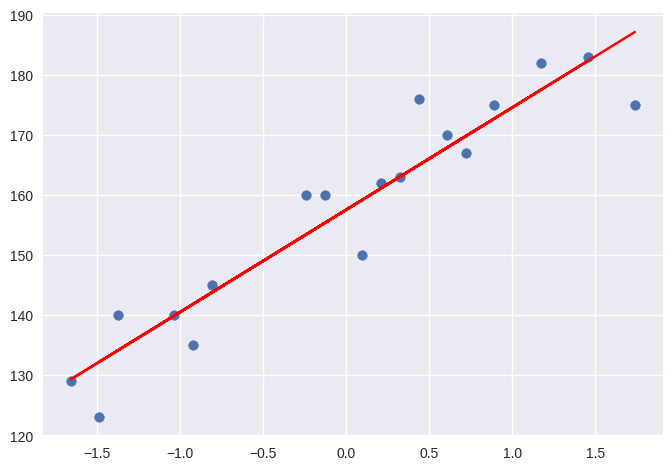

In [199]:
slope = regressor.coef_
#visualizing bbest-fit liine
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [173]:
print(x_test.shape)
print(y_test.shape)

(5, 1)
(5, 1)


In [174]:
y_pred_test = regressor.predict(x_test)
# y_pred_test,y_test

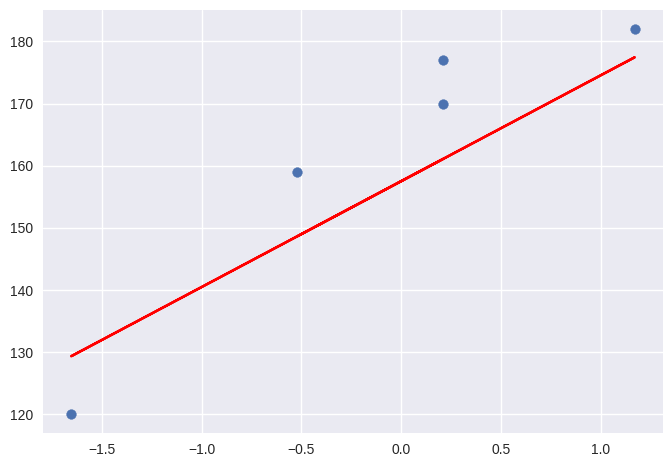

In [175]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

In [198]:
print(y_test,regressor.predict(x_test))

    Height
15     177
9      170
0      120
8      182
17     159 [[161.08467086]
 [161.08467086]
 [129.3041561 ]
 [177.45645118]
 [148.56507414]]


## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [195]:
#1- MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('MAE: ',mae)
print('RMSE: ',rmse)



MSE:  109.77592599051664
MAE:  9.822657814519232
RMSE:  10.477400726827081


### Rsquare

In [196]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print("R-sq Score: ",score)

R-sq Score:  0.776986986042344


### Adjusted Rsquare
#### adjusted R2 = 1-{ [(1-R2) * (n-1)] / (n-k-1) }

In [197]:
#adjusted R2
adjusted_R2 = 1-(1-score) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)
print(adjusted_R2)

0.7026493147231252


### Predictiong for new weight = 80

In [206]:
scaled_weight = scaler.transform([[80]])
print("Scaled_weight: ",scaled_weight)

##giving this scaled value for prediction
print(f"Predicted Height for Weight 80kg is: ",regressor.predict(scaled_weight))

Scaled_weight:  [[0.32350772]]
Predicted Height for Weight 80kg is:  [[163.01076266]]


## Assumption ert Linear Regression model
1. Since we have a nearly linear distribution in Y_test Vs y_pred_test graph therefore prediction is good.
2. Residuals: It is the difference between the actual point an predicted point
3. If Prediction vs residual grph is a uniform distribbution then we have a good model

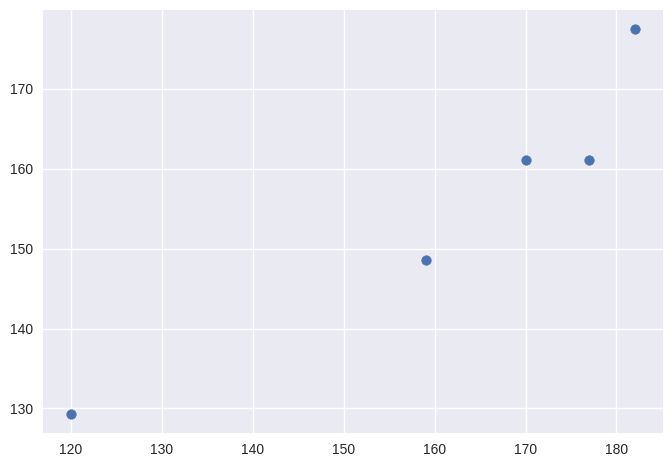

In [207]:
#Asumptions
##Scatter plot of required y and predicted y
plt.scatter(y_test,y_pred_test)

Insight: 
**Since we have a nearly linear distribution in Y_test Vs y_pred_test graph therefore prediction is good.**

### Residuals:
#### It is the difference between the actual point an predicted point

In [219]:
#residuals
residuals = y_test-y_pred_test
print(residuals.reset_index(drop=True).rename(columns={'Height':'Residuals'},inplace=True))

None


Text(0.5, 0, 'Residuals')

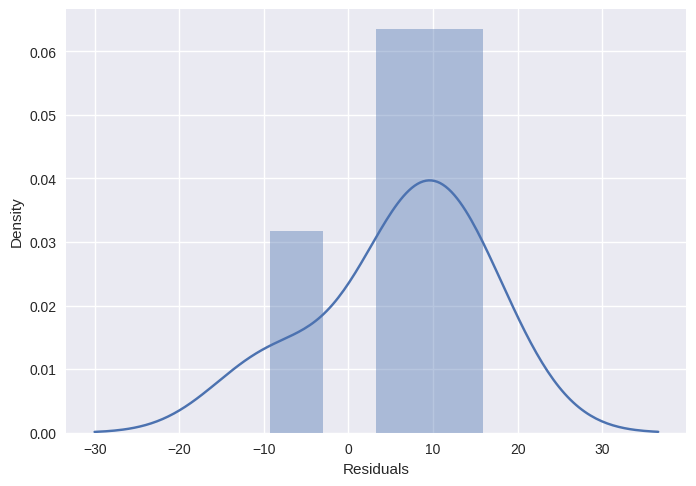

In [221]:
import seaborn as sns
sns.distplot(residuals,kde=True)
plt.xlabel('Residuals')

### Scatter plor wrrt prediction and residuals 
#### If Prediction vs residual grph is a uniform distribbution then we have a good model

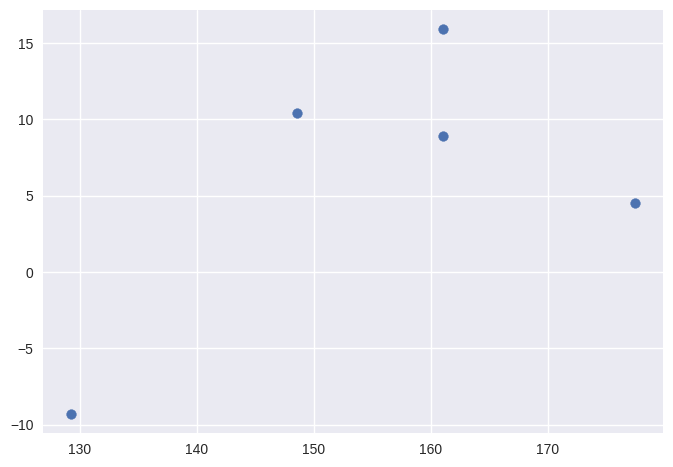

In [222]:
plt.scatter(y_pred_test,residuals)

# -------------------------------------------------------------------------------------------------------------

# 2)- Multiple Linear Regression

In [51]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [52]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [53]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [54]:
#this dataset is type of dictionary
#getting discription of this dataset
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [55]:
## getting data
print(dataset.data)
print(dataset.data.shape)


[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
(20640, 8)


In [56]:
## Traget o/p
print(dataset.target)
print(dataset.target.shape)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
(20640,)


In [57]:
#Converting to dataframe
df1 = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df2 = pd.DataFrame(data = dataset.target,columns=dataset.target_names)
# df1.head()

#concatiniting df1 and df2
df = pd.concat([df1,df2],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [60]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [61]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

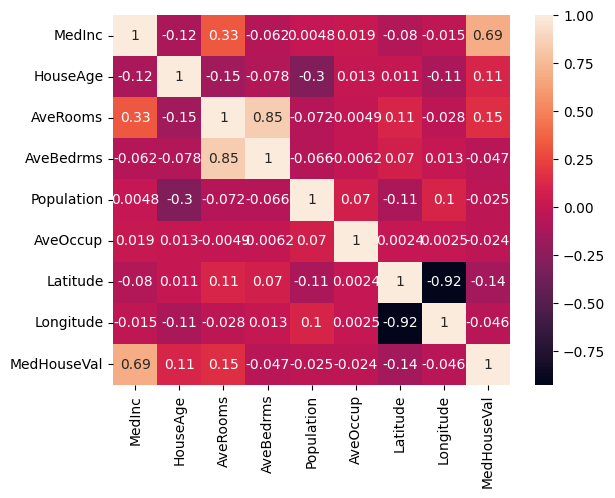

In [62]:
sns.heatmap(data=df.corr(),annot=True)

### dividing data into independent and dependent feature

In [63]:
## dividing data into independent and dependent feature
x = df1 #independent features
y = df2 #dependent features

### Train-Test Splitting

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (13828, 8), x_test shape: (6812, 8)
y_train shape: (13828, 1), y_test shape: (6812, 1)


### Standardizing x_train and x_test dataset

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Training

In [66]:
from sklearn.linear_model import LinearRegression


#creating object
regression = LinearRegression()

#fitting with training data
regression.fit(x_train,y_train)

LinearRegression()

In [67]:
#slope or coefficient
print("Slopes: ",regression.coef_)
##different slopes for each feature

Slopes:  [[ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
  -0.93017985 -0.89505497]]


In [68]:
#Intercept
regression.intercept_

array([2.06347681])

In [69]:
#prediction for the test data
y_pred = regression.predict(x_test)

In [70]:
y_pred

array([[3.00397485],
       [2.58011486],
       [2.3489077 ],
       ...,
       [3.09003708],
       [0.79152007],
       [2.04477012]])

In [71]:
x_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

### Performance Metrics

In [72]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  0.5522332399363619
MAE:  0.5371056943007959
RMSE:  0.7431239734636219


### R2 and Adjested R2

In [73]:
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 score: ",r2)

R2 score:  0.593595852643664


In [74]:
## Adjusted R square
#display adjusted R-squared
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5931179409607519

## Assumption to uderstand weather  the model is good or not

### 1- Plotting y_test vs y_pred

Text(0, 0.5, 'Pridicted Data')

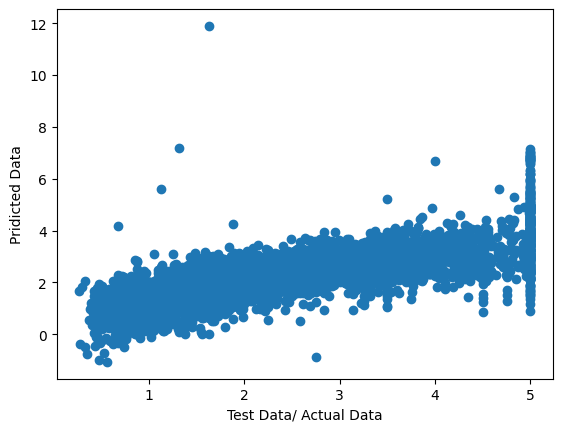

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel('Test Data/ Actual Data')
plt.ylabel("Pridicted Data")

### 2- Plotting residuals

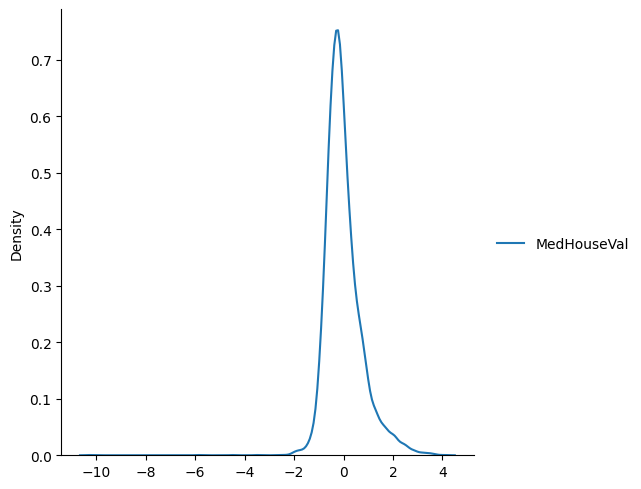

In [76]:
residuals = y_test - y_pred
sns.displot(residuals,kind='kde')

As plot looks like a normal distribution therefore its a good model

### 3- plotting y_pred vs residuals

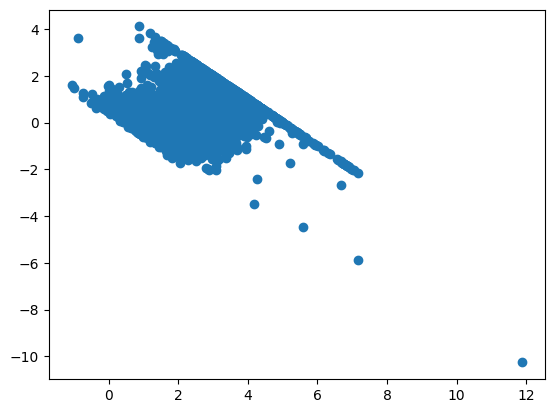

In [77]:
plt.scatter(y_pred,residuals)

**As this plt is not uniform and follows a linear pattern therefore its not a good model therefore we may have to apply other algorithms to improve it**

# In What format the model neds to be Extracted for deploying into the cloud?
## Pickling Module
### Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [81]:
import pickle
pickle.dump(regression,open('Resources/Regression_california_price_pred.pk1','wb'))

In [82]:
#loading picklle
model = pickle.load(open('Resources/Regression_california_price_pred.pk1','rb'))

In [83]:
y_pred_2 = model.predict(x_test)

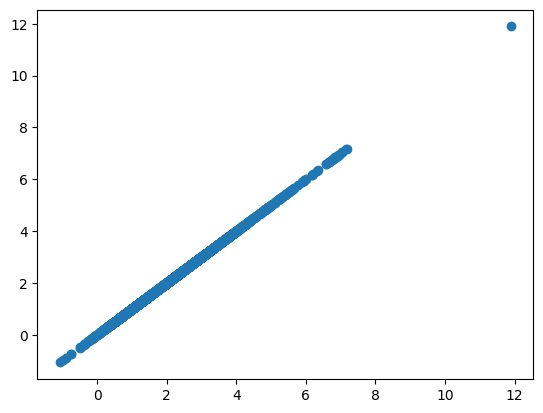

In [84]:
plt.scatter(y_pred,y_pred_2)

# <a href="https://www.youtube.com/watch?v=3L_-JbFxftM">Polynomial Regression</a>
### We can use a Linear model to fit a non linear data by adding powers of each feature as new feature, then training a linear model on this extended set of features

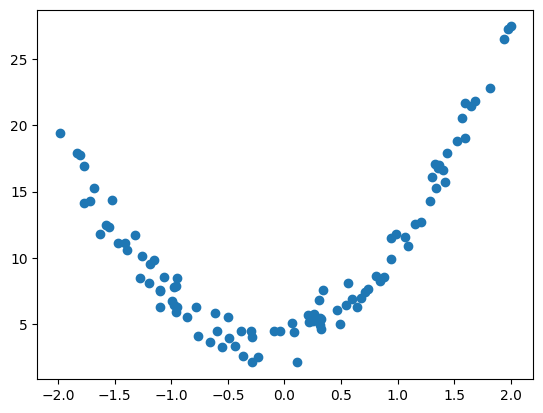

In [118]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## generatuing some non-linear data
X = 4* np.random.rand(100,1) -2 #random array of size (100,1)
y = 4 + 2*X + 5 * X**2 + np.random.randn(100,1)

plt.scatter(X,y)
plt.show()

[[2.02802243 4.98043049]] [4.03035578]


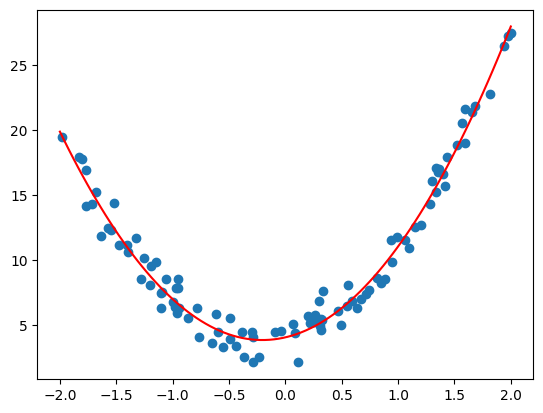

In [125]:
#Taking linear feature and squaring it and using it as an additional feature
poly_feature = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_feature.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly,y)

print(reg.coef_,reg.intercept_)

#x value for test
X_vals = np.linspace(-2,2,100).reshape(-1,1)
X_vals_poly = poly_feature.transform(X_vals)

y_vals = reg.predict(X_vals_poly)
plt.scatter(X,y)
plt.plot(X_vals,y_vals,color='r')
plt.show()